In [17]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import datetime
from StringIO import StringIO
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (6, 2.5)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

In [2]:
projects_details=pd.read_csv('./testing/next_work/6k_projects_details.csv',sep=';', dtype=object, index_col=None)
projects_details=projects_details.sort_values('stars',ascending=True)
for i,st in enumerate(projects_details):
    if i==0:
        continue
    projects_details[st]=projects_details[st].apply(int)
projects_details.describe(include='all')
projects_details.tail()

,project,forks,stars,subscriber,size
1831,pentaho_big-data-plugin.git,194,99,93,68238
3526,jenkinsci_scm-sync-configuration-plugin.git,101,99,152,863
3284,richardwilly98_elasticsearch-river-mongodb.git,217,992,86,15131
987,killme2008_Metamorphosis.git,631,994,247,3290
2476,netty_netty.git,4861,9990,1260,47087


In [ ]:
 #Just the project checkstyle
checkstyle_checkstyle=pd.read_csv('../4_libraries/csv/checkstyle_checkstyle.git.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
checkstyle_checkstyle=checkstyle_checkstyle.drop('commit',1)
for x,stri in enumerate(checkstyle_checkstyle):
    if x>0:
        checkstyle_checkstyle[stri]= checkstyle_checkstyle[stri].apply(int)
checkstyle_checkstyle.plot(['date'])
plt.xlim('2002-06','2016-07')

# db_evolution up to 2017, just files not classes
db_test_coverage=pd.read_csv('../4_libraries/csv/evolution_db_test_coverage.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(db_test_coverage):
    if x>0:
        db_test_coverage[stri]= db_test_coverage[stri].apply(int)
db_test_coverage['tested_files']=db_test_coverage['tested_files']/db_test_coverage['db_files']
db_test_coverage.plot(x="date", y="tested_files", figsize=(18, 6), color='green')
plt.xlim('2006-07','2016-07')
plt.ylabel('database files')

C:\Users\Ahmed\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


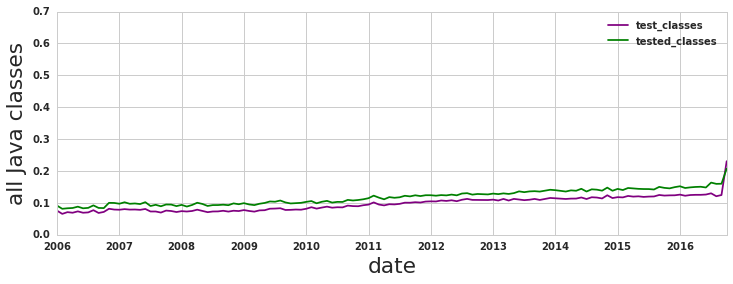

In [2]:
test_coverage=pd.read_csv('./testing/next_work/TC_evolution_al_2016.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(test_coverage):
    if x>0 :
        test_coverage[stri]= test_coverage[stri].apply(int)

test_coverage['test_classes']=test_coverage['test_files']/(test_coverage['all_files'] + test_coverage['test_files'])
test_coverage['tested_classes']=test_coverage['tested_files']/test_coverage['all_files']
test_coverage=test_coverage.drop('total',1)
test_coverage=test_coverage.drop('all_files',1)
test_coverage=test_coverage.drop('tested_files',1)
test_coverage=test_coverage.drop('test_files',1)
ax=test_coverage.plot(['date'], y=['test_classes','tested_classes'], figsize=(12,4),
                                                    color=['purple','green'])
ax.set_xlim('2006','2016-10')
#plt.ylim(0,0.2)
plt.ylabel('all Java classes')
# they are files not classes

# All projects

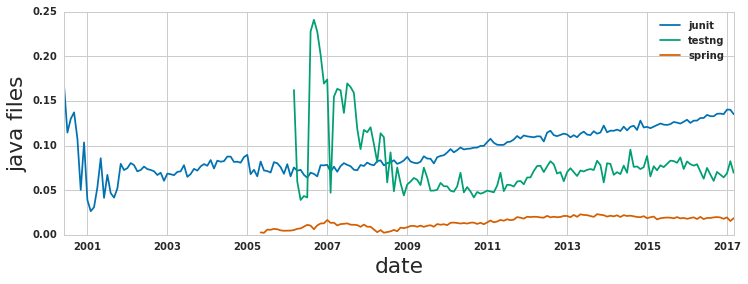

In [16]:
test_files=pd.read_csv('./testing/next_work/test_files_evolution.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(test_files):
        if x>0:
            test_files[stri]= test_files[stri].apply(int)
            
test_files['junit']=test_files['junit']/test_files['af_junit']
test_files['spring']=test_files['spring']/test_files['af_spring']
test_files['testng']=test_files['testng']/test_files['af_testng']
test_files.set_index('date',inplace=True)
ax=test_files.plot( y=['junit','testng','spring'])
ax.figure.set_size_inches(12,4)
ax.set_ylabel('java files')
plt.savefig('test_files_evo.pdf', bbox_inches='tight', facecolor='white')


C:\Users\Ahmed\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


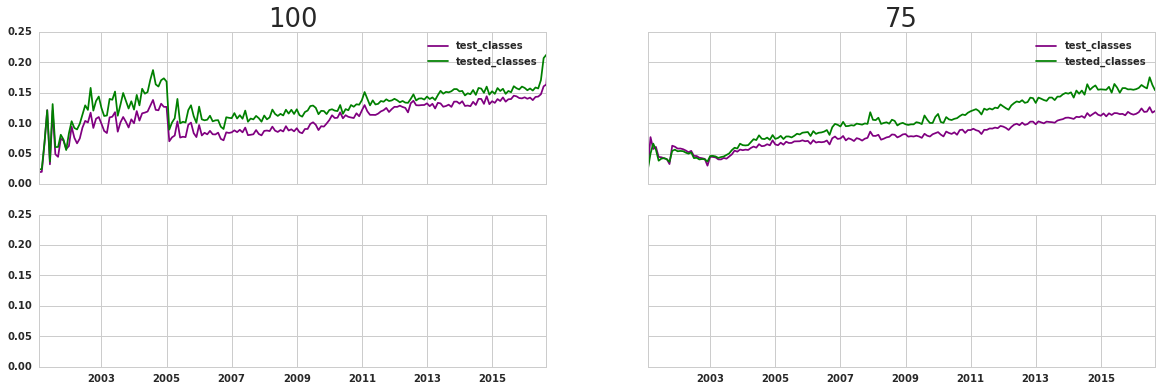

In [2]:
test_coverage=pd.read_csv('./testing/next_work/TC_evolution_4.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(test_coverage):
        if x>0:
            test_coverage[stri]= test_coverage[stri].apply(int)


fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

test_coverage['test_classes']=test_coverage['test_files']/(test_coverage['all_files']+test_coverage['test_files'])
test_coverage['tested_classes']=test_coverage['tested_files']/test_coverage['all_files']
test_coverage=test_coverage.drop('total',1)
test_coverage=test_coverage.drop('all_files',1)
test_coverage=test_coverage.drop('tested_files',1)
test_coverage=test_coverage.drop('test_files',1)

for i,x in enumerate(test_coverage.tag.unique()):
    if(i<2):
        test_coverage[test_coverage['tag']==x].plot(['date'], y=['test_classes','tested_classes'], title=x,
                                                    color=['purple','green'], ax=axes[0][i%2])
    else:
        test_coverage[test_coverage['tag']==x].plot(['date'], y=['test_classes','tested_classes'], title=x,
                                                    color=['purple','green'], ax=axes[1][i%2])
#plt.ylim(0,0.2)
#plt.xlim('2006-07','2016-10')
fig.set_size_inches(20,6)
plt.ylabel('all Java classes')
# they are files not classes

# How many database classes are tested

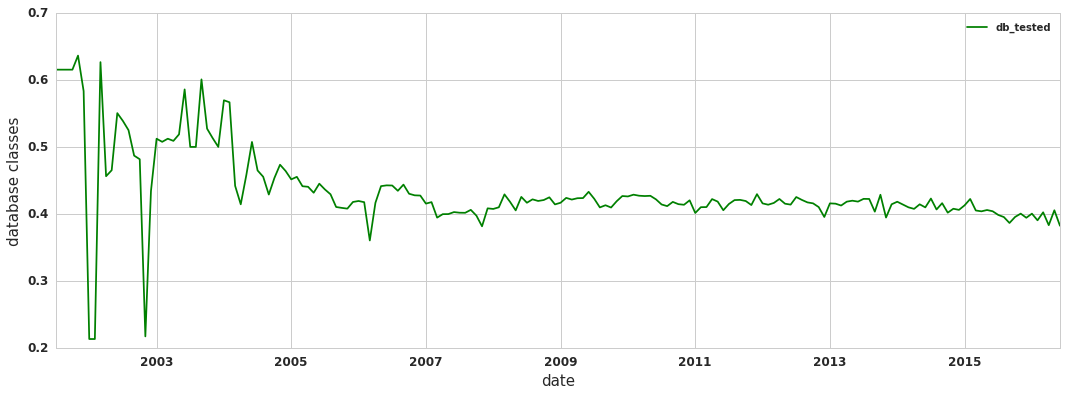

In [293]:
evolution_dbtest=pd.read_csv('./testing/next_work/evolution_dbtest_coverage.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evolution_dbtest):
    if i>0:
        evolution_dbtest[p]= evolution_dbtest[p].apply(int)
evolution_dbtest['db_tested']=evolution_dbtest['db_tested']/evolution_dbtest['db_classes']
evolution_dbtest.plot(x="date", y="db_tested", figsize=(18, 6), color='green')
plt.xlim('2001-07','2016-06')
plt.ylabel('database classes')
evolution_dbtest=evolution_dbtest.drop('total',1)


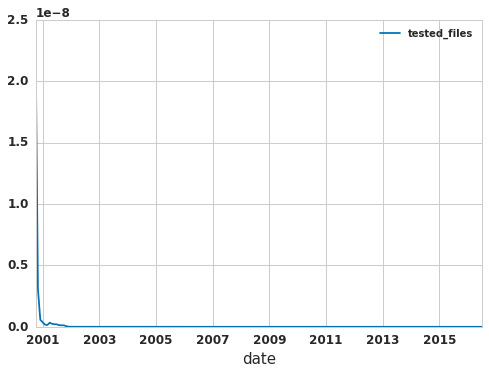

In [300]:
evolution_dbtest['tested_files']=evolution_dbtest['tested_files']/(evolution_dbtest['all_files'])
evolution_dbtest.plot(x='date',y='tested_files')

# metics abouot all files in projects, and tested files, and test files, and database files, and tested database files

(438L, 557L)

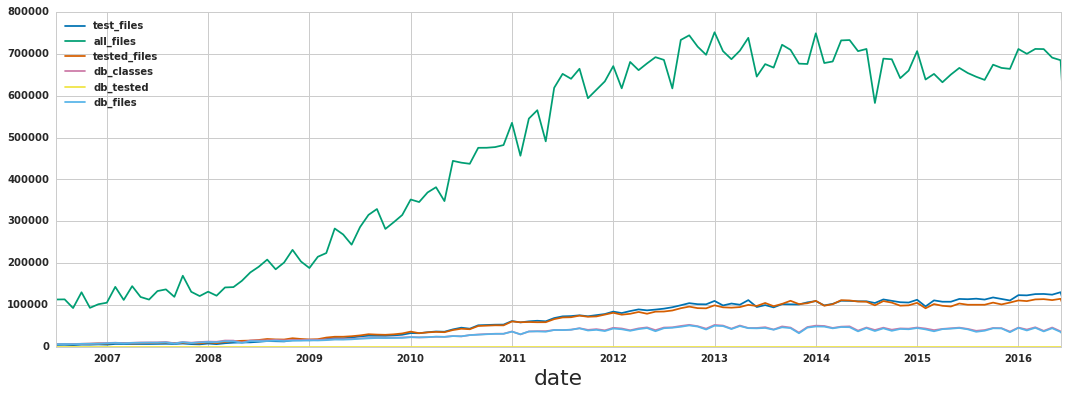

In [100]:
evolution_dbtest.plot(['date'],figsize=(18, 6))
plt.xlim('2006-07','2016-06')

# Tested database classes grouped by library ( jdbc, hibernate and jpa)

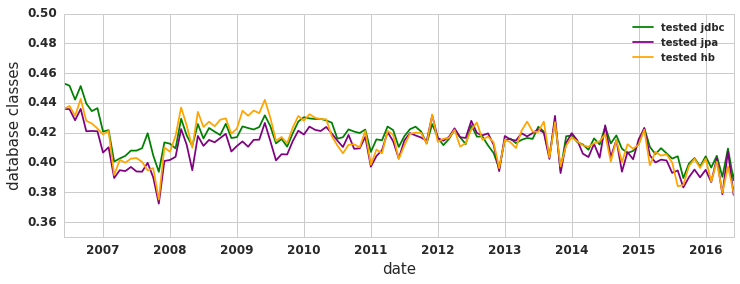

In [292]:
evo_dbTest_3libs=pd.read_csv('./testing/next_work/evo_dbTest_3libs.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evo_dbTest_3libs):
    if i>0 and i<7:
        evo_dbTest_3libs[p]= evo_dbTest_3libs[p].apply(int)
evo_dbTest_3libs['tested_db']=evo_dbTest_3libs['db_tested']/evo_dbTest_3libs['db_classes']
#evo_dbTest_3libs['tested_db2']=evo_dbTest_3libs['db_tested']/evo_dbTest_3libs['tested_files']

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 15

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(x="date", y="tested_db", figsize=(12, 4), color='green', label='tested jdbc')
#ax1=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot( x="date", y="tested_db2", linestyle='--', figsize=(12, 4), color='green', label='jdbc')

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date", y="tested_db", figsize=(12, 4), color='purple',label='tested jpa')
#ax1=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax1, x="date", y="tested_db2", linestyle='--', figsize=(12, 4), color='purple',label='jpa')

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date", y="tested_db", figsize=(12, 4), color='orange', label='tested hb')
#ax1=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax1, x="date", y="tested_db2", linestyle='--',figsize=(12, 4), color='orange', label='hb')

plt.xlim('2006-06','2016-06')
plt.ylabel('database classes')
plt.ylim(0.35,0.5)
plt.savefig('co-evoluttion_db.pdf', bbox_inches='tight', facecolor='white')


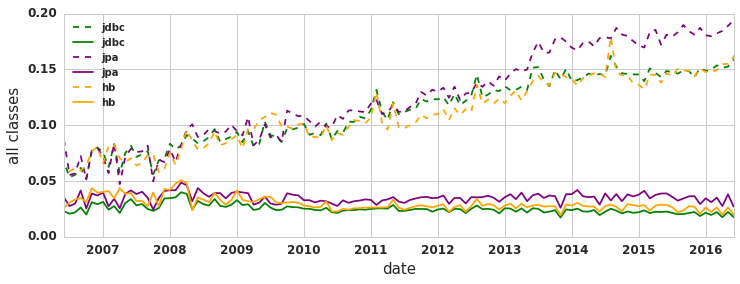

In [56]:
evo_dbTest_3libs=pd.read_csv('./testing/next_work/evo_dbTest_3libs_details.csvcsv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evo_dbTest_3libs):
    if i>0 and i<7:
        evo_dbTest_3libs[p]= evo_dbTest_3libs[p].apply(int)
evo_dbTest_3libs['tested_classes']=evo_dbTest_3libs['tested_files']/evo_dbTest_3libs['all_files']
evo_dbTest_3libs['tested_db2']=evo_dbTest_3libs['db_tested']/evo_dbTest_3libs['all_files']

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 15

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(x="date", y="tested_classes", linestyle='--', figsize=(12, 4), color='green', label='jdbc')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(ax=ax, x="date",  y="tested_db2", figsize=(12, 4), color='green', label='jdbc')

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date",linestyle='--', y="tested_classes", figsize=(12, 4), color='purple',label='jpa')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date", y="tested_db2", figsize=(12, 4), color='purple',label='jpa')

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date",linestyle='--', y="tested_classes", figsize=(12, 4), color='orange', label='hb')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date", y="tested_db2", figsize=(12, 4), color='orange', label='hb')

plt.xlim('2006-06','2016-06')
plt.ylabel('all classes')
plt.ylim(0,0.2)
plt.savefig('co_evolution_db_test.pdf', bbox_inches='tight', facecolor='white')


In [3]:
dbtest_snapchots=pd.read_csv('./testing/next_work/dbtest_snapchots.csv',
                                sep=';', dtype=object, index_col=None)
                              #parse_dates=['date'], infer_datetime_format="%Y-%m")

dbtest_snapchots=dbtest_snapchots.dropna() # drop NaN lines
for x,stri in enumerate(dbtest_snapchots):
    if x>1 :
        dbtest_snapchots[stri]= dbtest_snapchots[stri].apply(int)
dbtest_snapchots.head(1)

,project,date,test_files,all_files,tested_files,db_classes,db_tested,db_files
0,101companies_101repo.git,2012-06,60,557,48,19,8,25


# boxplots about a snapshot for each year for all projects that use database libraries

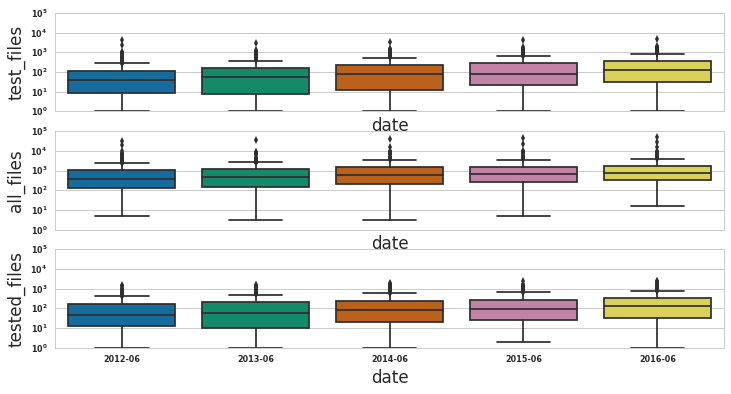

In [15]:
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)
plt.rcParams['figure.figsize']=(12,6)

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)
for x,stri in enumerate(dbtest_snapchots):
    if x>1 and x <5:
        ax = sns.boxplot(y=stri, x='date', data=dbtest_snapchots, ax=axes[x-2])
ax.set_yscale('log')
fig.savefig('distribution_test.pdf', bbox_inches='tight', facecolor='white')


# The checkstyle project only:


(730637.0, 736146.0)

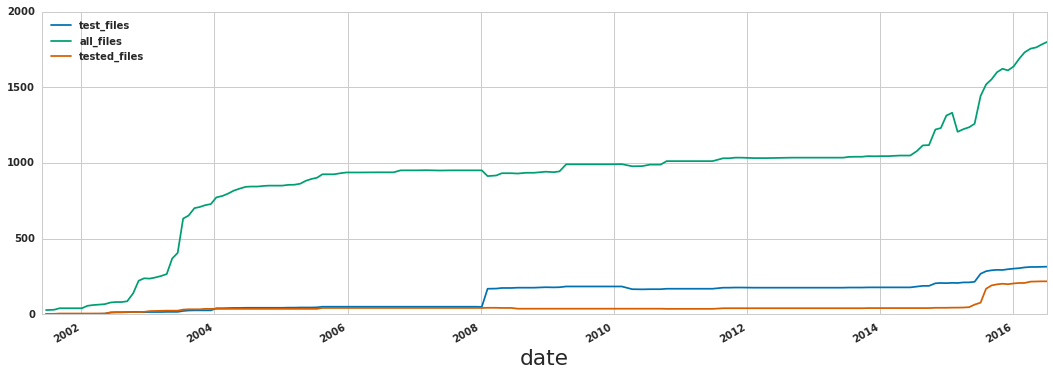

In [109]:
checkstyle_checkstyle=pd.read_csv('./testing/next_work/checkstyle_checkstyle.git.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
checkstyle_checkstyle=checkstyle_checkstyle.drop('commit',1)
for x,stri in enumerate(checkstyle_checkstyle):
    if x>0:
        checkstyle_checkstyle[stri]= checkstyle_checkstyle[stri].apply(int)
checkstyle_checkstyle.plot(['date'], figsize=(18, 6))
plt.xlim('2001-06','2016-07')